# Week 03(End to End Machine Learning)

Kembali ke [Sains Data](../sainsdata2023.qmd)

## Regression

### Import Library

import library yang dibutuhkan terlebih dahulu untuk pengolahan dan visualisasi data.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Observation

Upload dataset yang akan digunakan dan observasi
[click disini](https://drive.google.com/open?id=1vuXkaiGadqlMa7WWOUZoRR5ENIX6qHwI&authuser=carlesoctavianus%40gmail.com&usp=drive_fs)

In [2]:
salary =  pd.read_csv('Salary_dataset.csv')
salary

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [3]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


### Data Cleaning

Melihat jumlah data null pada dataset

In [11]:
salary.isna().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

Melihat jumlah data duplikat pada dataset

In [12]:
salary.duplicated().sum()

0

Menghapus kolom 'Unnamed :0' dari DataFrame secara permanen

In [13]:
salary.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
salary

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


### EDA

Mengubah setiap nilai di kolom Salary dan mengubah nama kolomnya di DataFrame secara permanen

In [16]:
salary['Salary'] = salary['Salary']/1000
salary.rename(columns={'Salary' : 'Salary (1000 $)'}, inplace=True)

Melihat statistik deskriptif dari DataFrame

In [17]:
salary.describe()

,YearsExperience,Salary (1000 $)
count,30.000000,30.00000
mean,5.413333,76.00400
std,2.837888,27.41443
min,1.200000,37.73200
25%,3.300000,56.72175
50%,4.800000,65.23800
75%,7.800000,100.54575
max,10.600000,122.39200


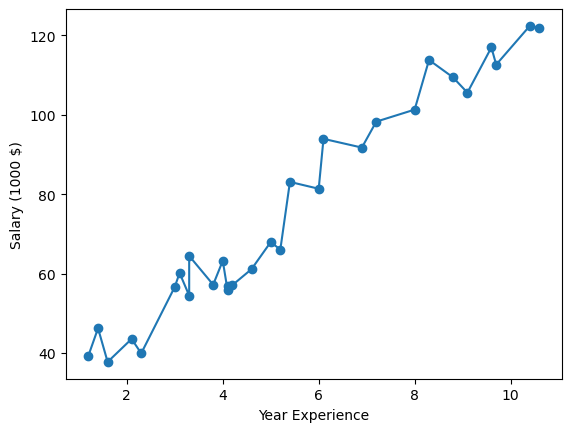

In [26]:
plt.scatter(salary['YearsExperience'],salary['Salary (1000 $)'])
plt.plot(salary['YearsExperience'],salary['Salary (1000 $)'])
plt.xlabel('Year Experience')
plt.ylabel('Salary (1000 $)')
plt.show()

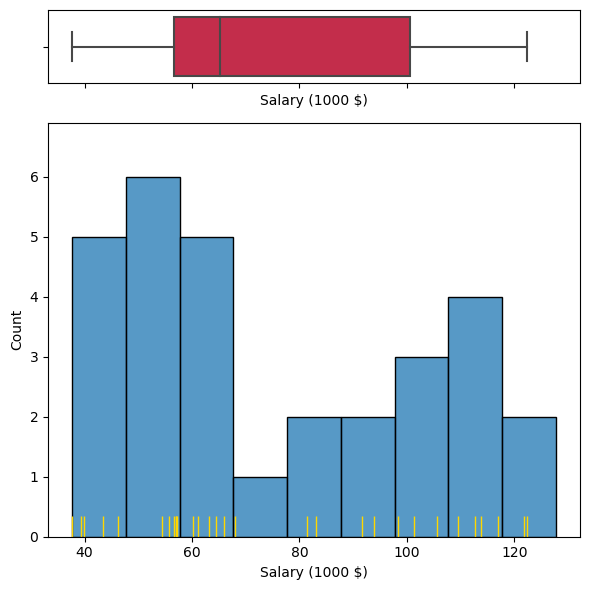

In [20]:
fig, (ax_box, ax_hist) = plt.subplots(2, 1, figsize=(6, 6), sharex='col',
                                      gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=salary, x='Salary (1000 $)', ax=ax_box, color='crimson')
sns.histplot(data=salary, x='Salary (1000 $)', ax=ax_hist, binwidth=10.)
sns.rugplot(data=salary, x='Salary (1000 $)', ax=ax_hist, height=0.05, color='gold', lw=2.)
plt.tight_layout()

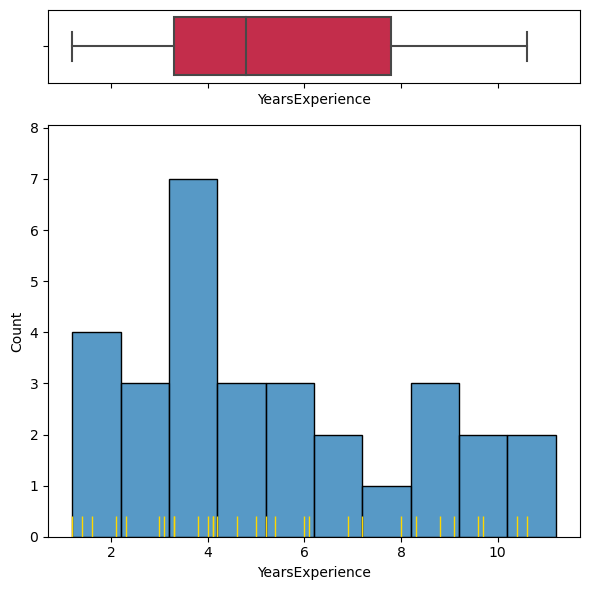

In [28]:
fig, (ax_box, ax_hist) = plt.subplots(2, 1, figsize=(6, 6), sharex='col',
                                      gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=salary, x='YearsExperience', ax=ax_box, color='crimson')
sns.histplot(data=salary, x='YearsExperience', ax=ax_hist, binwidth=1.)
sns.rugplot(data=salary, x='YearsExperience', ax=ax_hist, height=0.05, color='gold', lw=2.)
plt.tight_layout()

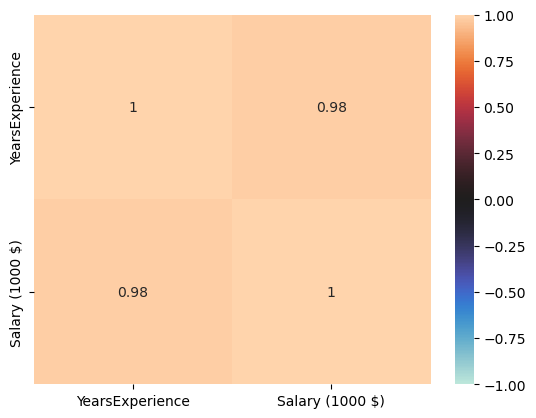

In [29]:
corr = salary.corr()
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True)
plt.show()

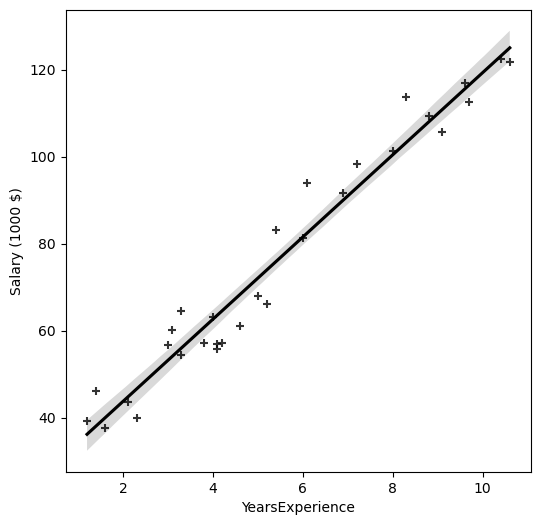

In [31]:
plt.subplots(figsize=(6,6))

sns.regplot(data = salary, x='YearsExperience', y='Salary (1000 $)', color='k', marker='+')
plt.show()

### Feature Engineering

Karena pada dataset ini, fitur yang ada hanya 2, tidak ada masalah dan data sudah rapi, maka untuk step feature engineering akan skip dan lanjut ke tahap modelling. 

### Modelling

In [32]:
X = salary[['YearsExperience']]
y = salary[['Salary (1000 $)']]

In [33]:
X

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [34]:
y

,Salary (1000 $)
0,39.344
1,46.206
2,37.732
3,43.526
4,39.892
5,56.643
6,60.151
7,54.446
8,64.446
9,57.190


Split dataset menjadi data train dan data test dengan komposisi pembagian yang sering digunakan

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24, 1), (6, 1), (24, 1), (6, 1))

Import terlebih dahulu package yang akan digunakan untuk modelling

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
y_pred = lr.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_pred,y_test))
print(r2_score(y_pred,y_test))

49.830096855908344
0.8961838737587329


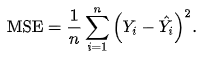          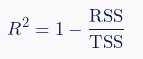 

Dimana: \
$n$ : jumlah data \
$Y_i$ : nilai actual \
$\hat{Y}_{i}$: nilai predict 

$RSS$ : sum of squared residuals \
$TSS$ : total sum of squares 

In [58]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[115.79121011 112.636     ]
 [ 71.49927809  67.939     ]
 [102.59786866 113.813     ]
 [ 75.26880422  83.089     ]
 [ 55.47879205  64.446     ]
 [ 60.19069971  57.19      ]]


## Classification

### Import Library

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

### Data Observation

In [61]:
heart = pd.read_csv('heart.csv')
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [63]:
# Membaca .txt tentang kolom - kolom dataset yang diberikan pada soal
with open('about dataset.txt', 'r') as f:
  print(f.read())

About datasets
1. age - age in years 
2. sex - sex (1 = male; 0 = female) 
3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic) 
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
5. chol - serum cholestoral in mg/dl 
6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 
7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy) 
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
11. slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping) 
12. ca - number of major vessels (0-3) colored by flourosopy 
13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect 
14. output - the predicted attribute - diagnosis of heart disease (0 = less chance of heart attack, 1 = higher chance of heart attack)



In [64]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [65]:
heart.output.value_counts()

1    165
0    138
Name: output, dtype: int64

### EDA

In [66]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


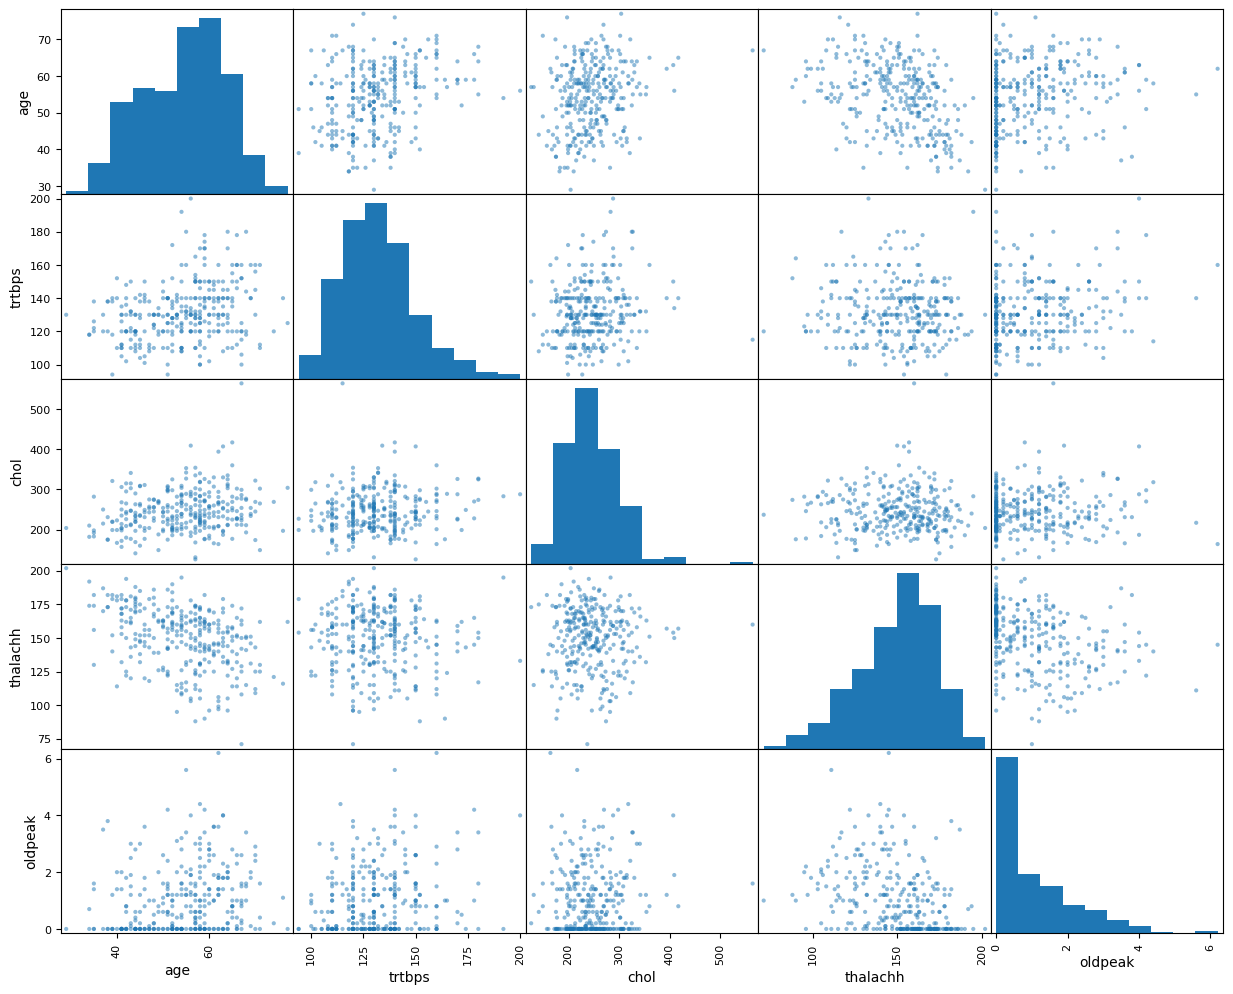

In [68]:
pd.plotting.scatter_matrix(heart[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']], figsize=(15,12)) # plot data yang numerik dan kontinu
plt.show()

Plot diatas saya ingin melihat korelasi secara kasar antara fitur - fitur yang numerik dan kontinu, melalui scatter plot, serta range nilai datanya melalui histogramnya.

Melalui scatter plot dapat kita lihat bahwa kita belum bisa menyimpulkan korelasi antara fitur - fitur, karena persebarannya sebagian besar sangat acak. Melalui histogram dapat dilihat bahwa range nilainya cukup berjauhan (oldpeak 0 sampai 6, sedangkan chol 100 sampai 500+), sehingga perlu dilakukan standarisasi pada data numerik nantinya dengan StandardScaler

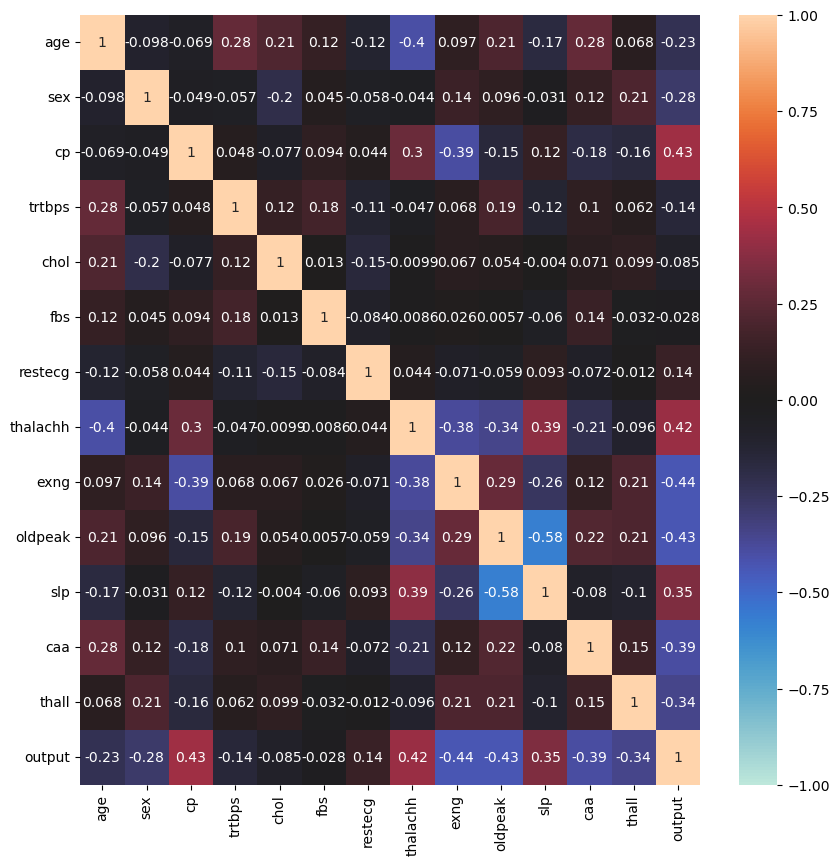

In [72]:
corr = heart.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True)
plt.show()

### Data Preprocessing

In [74]:
X = heart.drop('output',axis=1).copy()
y = heart.iloc[:,[-1]]

In [75]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [76]:
y

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [80]:
sc = StandardScaler()
col = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
X_train.loc[:,col] = sc.fit_transform(X_train.loc[:,col])

In [81]:
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
132,-1.356798,1,1,-0.616856,0.914034,0,1,0.532781,0,-0.920864,2,0,2
202,0.385086,1,0,1.169491,0.439527,0,0,-1.753582,1,-0.193787,2,0,3
196,-0.921327,1,2,1.169491,-0.300704,0,1,-0.139679,0,2.350982,1,0,2
75,0.058483,0,1,0.276318,0.059921,0,0,0.487950,0,0.351521,1,0,2
176,0.602822,1,0,-0.795490,-0.319684,1,1,0.443119,1,0.351521,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-0.485856,1,2,0.574042,-0.262744,0,1,0.577611,0,-0.375556,1,1,3
71,-0.376988,1,2,-2.165023,-0.376625,0,1,0.174136,1,-0.920864,2,1,3
106,1.582631,1,3,1.764940,-0.243763,1,0,-0.856969,0,-0.829979,1,1,2
270,-0.921327,1,0,-0.616856,0.040941,0,0,-0.274171,0,-0.193787,2,0,3


In [82]:
X_test.loc[:,col] = sc.transform(X_test.loc[:,col])
X_test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
179,0.276218,1,0,1.169491,0.553408,0,0,-1.708752,1,-0.375556,1,1,1
228,0.493954,1,3,2.360389,0.781172,0,0,0.398289,0,-0.739095,1,0,3
111,0.276218,1,2,1.169491,-2.293633,1,1,1.025918,0,-0.739095,2,1,3
246,0.167350,0,0,0.216773,3.077785,0,0,-0.005187,1,0.805944,1,2,3
60,1.800367,0,2,-1.212304,0.344625,1,0,-0.901800,0,-0.920864,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,1.582631,1,2,0.574042,0.135842,0,0,-0.184510,0,0.896828,1,3,3
104,-0.485856,1,2,-0.080952,-0.965014,0,1,0.577611,0,-0.920864,2,0,2
300,1.473764,1,0,0.812222,-1.021955,1,1,-0.408663,0,2.169213,1,2,3
193,0.602822,1,0,0.871767,0.667290,0,0,-0.363832,1,1.623905,1,2,3


### Model Selection

In [83]:
log_regr = LogisticRegression()
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# melakukan cross validation pada masing-masing metode
lr_score = cross_val_score(log_regr, X_train, y_train, cv=kfold, scoring='f1').mean()
svc_score = cross_val_score(svc, X_train, y_train, cv=kfold, scoring='f1').mean()
dt_score = cross_val_score(dt, X_train, y_train, cv=kfold, scoring='f1').mean()
rf_score = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='f1').mean()

In [86]:
for i in [lr_score, svc_score, dt_score, rf_score]:
    print(i)

0.838821143443002
0.8530945548368415
0.7278904812545365
0.8365591551305837


### Hyperparameter Tuning

In [ ]:
params = {'C':[0.01,0.05,0.1,0.7,0.5,1,5,10,50,100],     # hyperparameter yang akan dievaluasi untuk SVC
             'kernel':['poly','rbf']}

grid_search = GridSearchCV(svc, params, cv=kfold, scoring='f1')
grid_search.fit(X_train,y_train)

In [90]:
grid_search.best_params_, grid_search.cv_results_['mean_test_score'].max()

({'C': 0.7, 'kernel': 'rbf'}, 0.8596614105205573)

In [91]:
model = grid_search.best_estimator_
model.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.7)

In [93]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### Model Evaluation

In [94]:
f1_score(y_test,y_pred)

0.8923076923076922

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def evaluation_parametrics(name,y_val, y_pred):
    
    print("\n------------------------{}------------------------\n".format(name))

    cm_test = confusion_matrix(y_val, y_pred)
    t1 = ConfusionMatrixDisplay(cm_test)    
    print("\nClassification Report for Data Test\n")
    print(classification_report(y_val, y_pred))   
    print("--------------------------------------------------------------------------")

    t1.plot()


------------------------Machine Learning - Classification------------------------


Classification Report for Data Test

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

--------------------------------------------------------------------------


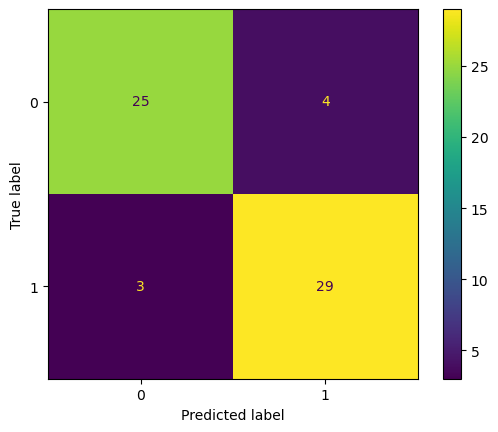

In [100]:
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred)

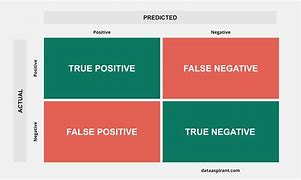

Perbandingan data actual dan data prediksi

In [97]:
print(np.concatenate((y_test.values.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

[[0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


### Features Important

In [101]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model, X_test, y_test, n_repeats=10,
                                scoring='f1', random_state=42)

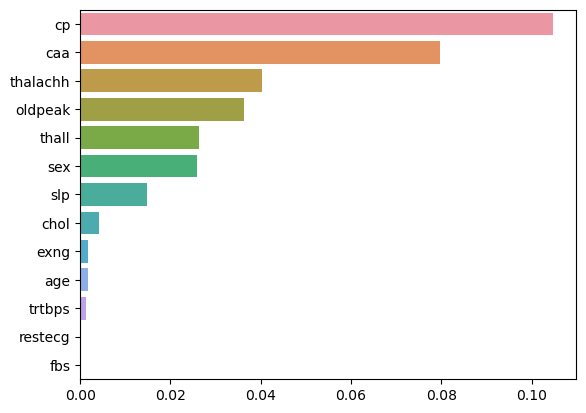

In [104]:
result_sorted = []
columns_sorted = []

for res, col in sorted(zip(result.importances_mean, X_test.columns.values), reverse=True):
  result_sorted.append(res)
  columns_sorted.append(col)

sns.barplot(x = result_sorted, y = columns_sorted)
plt.show()

### Save Model

Simpan model ke dalam file dan model siap digunakan untuk predict

In [98]:
import joblib
joblib.dump(model,'model_SVC.pkl')

['model_SVC.pkl']